-Ötegezegeni bulunmayan yıldız verisi analizi

In [1]:
from lightkurve import search_targetpixelfile

pixelfile = search_targetpixelfile("KIC 11026764", quarter=16).download(quality_bitmask='hardest');

D:\anaconda\envs\simulation\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


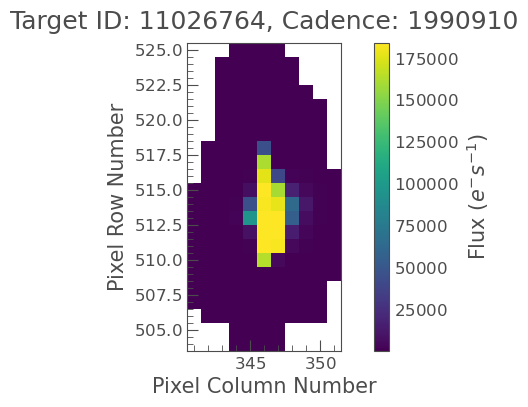

In [7]:
import matplotlib.pyplot as plt
pixelfile.plot(frame=1000)
plt.show()

In [8]:
pixelFile = search_targetpixelfile('KIC 11026764', quarter=4).download()

In [10]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)

In [13]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[352.37710496 352.39753801 352.43840412 ... 442.16224177 442.18267586
  442.20310986]>,
 <Quantity [2825184.5, 2825194.5, 2825018.5, ..., 2818537.5, 2818367.8,
            2818449.8] electron / s>)

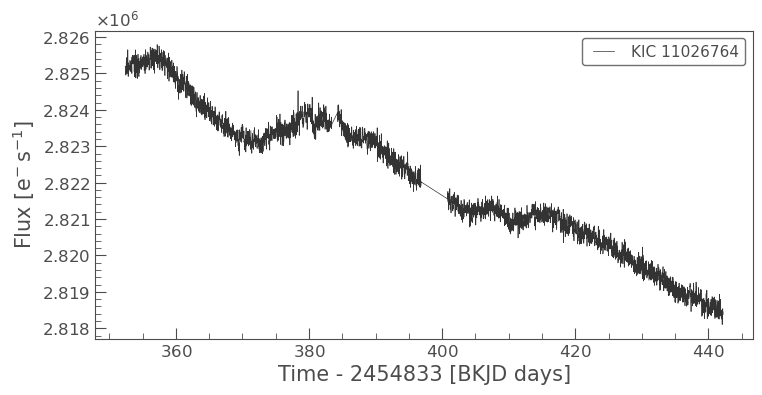

In [14]:
lc.plot()
plt.show()

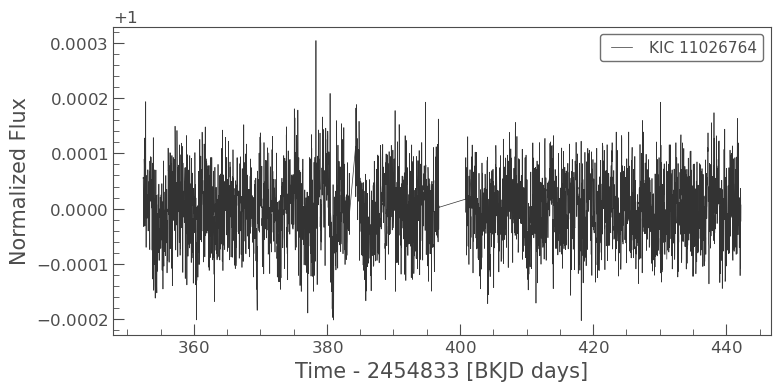

In [15]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()
plt.show()

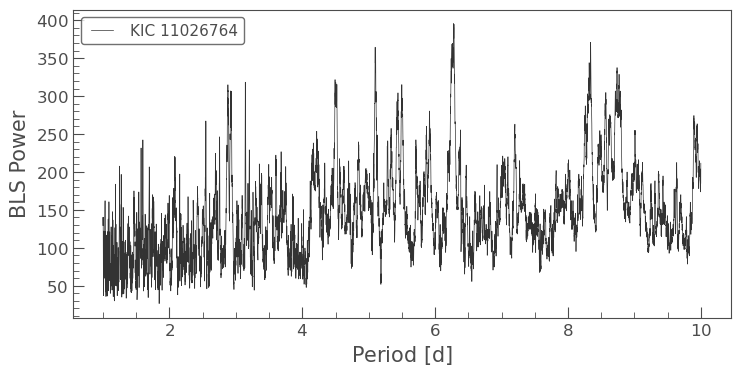

In [24]:
import numpy as np
periodogram = flat_lc.to_periodogram(
    method="bls", 
    period=np.arange(1, 10, 0.001),
     # hata verdiği için 0.3 ten küçük bir değer girildi
)
periodogram.plot()
plt.show()

In [25]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

Best fit period: 6.27700 d


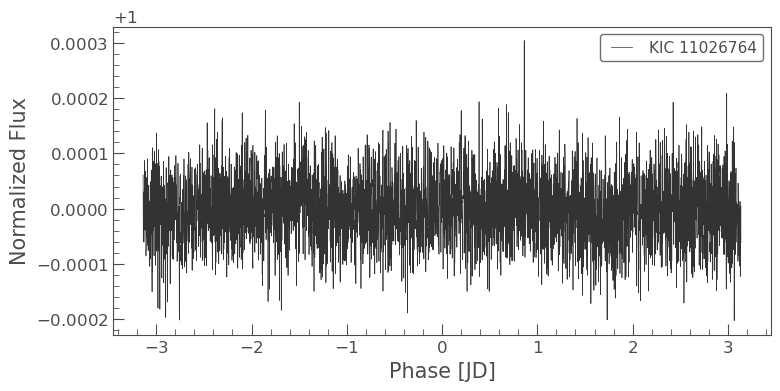

In [26]:
folded_lc = flat_lc.fold(period=6.277)
folded_lc.plot()
plt.show()

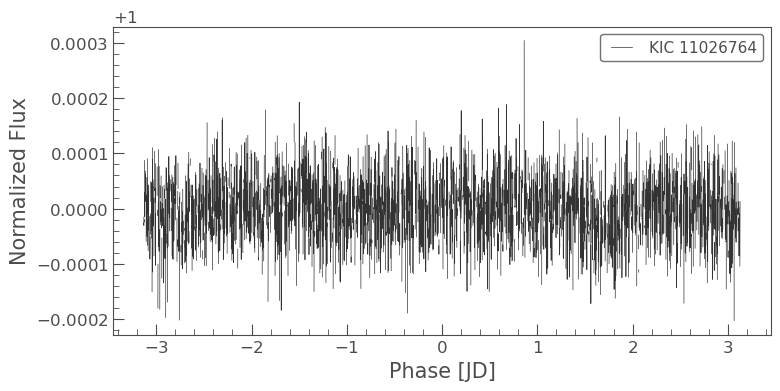

In [27]:
binned_lc = folded_lc.bin(time_bin_size=0.001)
binned_lc.plot()
plt.show()

In [28]:
from lightkurve import search_targetpixelfile
import lightkurve as lk
search_result = lk.search_targetpixelfile('KIC 11026764', mission='Kepler')
tpf = search_result.download(quality_bitmask='default')

D:\anaconda\envs\simulation\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 57 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [29]:
tpf.mission
tpf.targetid 

11026764

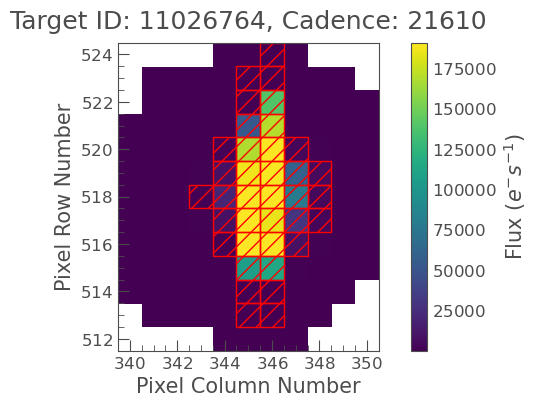

In [30]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

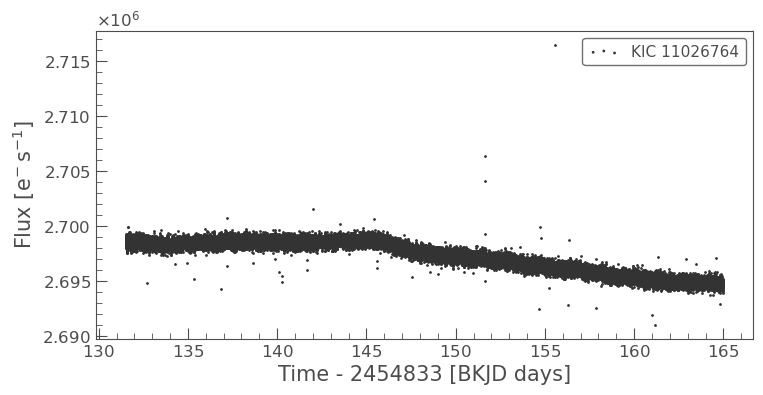

In [31]:
lc = tpf.to_lightcurve()  #pikseli ışık eğrisine dönüştürme
lc.scatter()
plt.show()

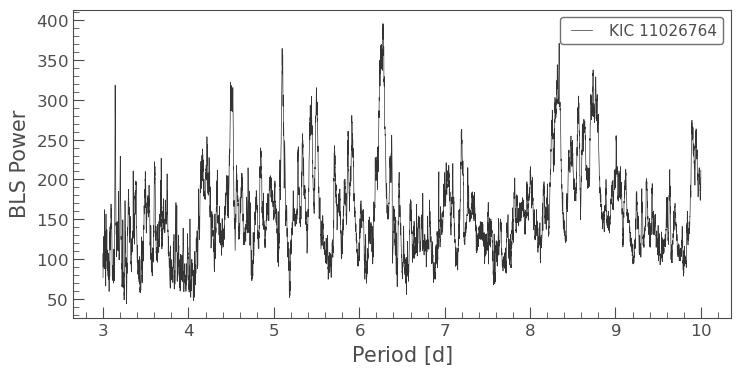

In [42]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(3, 10, 0.001))
periodogram.plot()
plt.show()

In [43]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 6.277 d


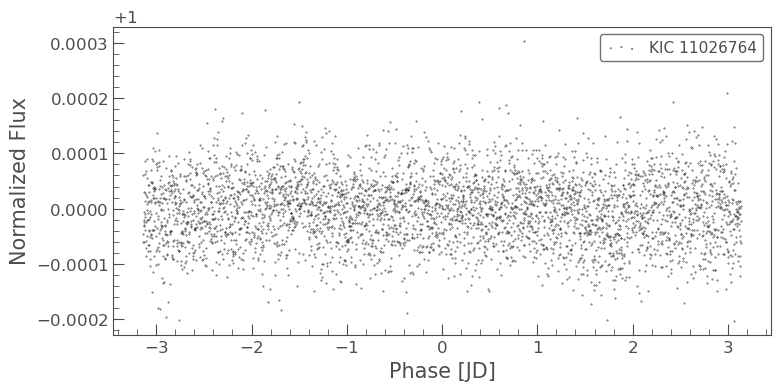

In [41]:
folded_lc = clipped_lc.fold(period=6.277)
folded_lc.scatter(s=0.5)
plt.show()